Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.975411531
Epoch: 0002 cost = 1.150796068
Epoch: 0003 cost = 0.903651972
Epoch: 0004 cost = 0.787480143
Epoch: 0005 cost = 0.714347795
Epoch: 0006 cost = 0.663782198
Epoch: 0007 cost = 0.625160652
Epoch: 0008 cost = 0.594753492
Epoch: 0009 cost = 0.569160740
Epoch: 0010 cost = 0.547868572
Epoch: 0011 cost = 0.530026864
Epoch: 0012 cost = 0.513746243
Epoch: 0013 cost = 0.499196470
Epoch: 0014 cost = 0.487182105
Epoch: 0015 cost = 0.475395189
Learning finished
Accuracy: 0.8884
Label: [4]
Prediction: [4]


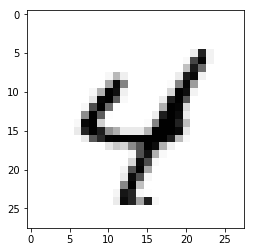

In [6]:
## MNIST : 손으로 쓴 숫자들로 이루어진 데이터베이스 ##
## 숫자 이미지는 28*28, 총 784 픽셀로 되어있다. ##

import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)

# https://www.tensorflow.org/get_started/mnist/beginners
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 숫자 0 ~ 9까지 10개
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Parameters
training_epochs = 15
batch_size = 100
# epoch : 전체 데이터를 1번 학습하면 1 epoch
# batch_size : 전체 데이터를 n개씩 나누어 학습
# 전체 데이터를 100개씩 나누어서 학습하되, 전체 데이터를 15번 학습
# 예를 들어, 전체 데이터가 1000개이면, 100개씩 10번 학습하면 1 epoch
# 따라서 총 150번 학습하면 15 epochs

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], 
                            feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1),
             'cost =', '{:.9f}'.format(avg_cost))
        
    print("Learning finished")
    
    # 정확도
    print("Accuracy:", accuracy.eval(session=sess, 
            feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # 랜덤으로 하나를 가져와서 예측
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
            feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest'
    )
    plt.show()
        